# **Understanding the business problem**

Customer behavior and booking possibilities have been radically changed by online hotel reservation channels. Cancellations or no-shows cause a significant number of hotel reservations to be canceled. Cancellations can be caused by a variety of factors, such as scheduling conflicts, changes in plans, etc. In many cases, this is made easier by the possibility of doing so free or at a low cost, which is beneficial for hotel guests but less desirable and possibly revenue-diminishing for hotels.

# **Understanding the data**

We have exactly 42099 rows of training data which we have used for the training of our models. The predictor variables are 19 different attributes of customers' reservation details, such as Booking_ID, No of adults, No of children, typeofmeal_plan, roomtypereserved, lead_time, arrival_month, repeated_guest, etc.

The target variable is a binary variable called "booking_status" which represents whether the reservation was cancelled or not.

1.   booking_status = 1 means that the reservation has been cancelled
2.   booking_status = 0 means that the reservation has not been cancelled

Our job is to build a Machine Learning model to help the Hotel Owners better understand if the customer is going to honor the reservation or cancel it. We will, therefore, build a model which can reliably predict the booking status.




In [395]:
# IMPORTING PACKAGES AND LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc, RocCurveDisplay
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from 

# **Exploratory Data Analysis & Data Quality**

In [396]:
df =  pd.read_csv('train.csv')

In [397]:
print(df.shape)

(42100, 19)


In [398]:
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [399]:
df.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,21049.500000,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,12153.367503,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10524.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,21049.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,31574.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,42099.000000,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [400]:
df.drop(['id'], axis=1, inplace=True)

<Axes: xlabel='no_of_adults', ylabel='count'>

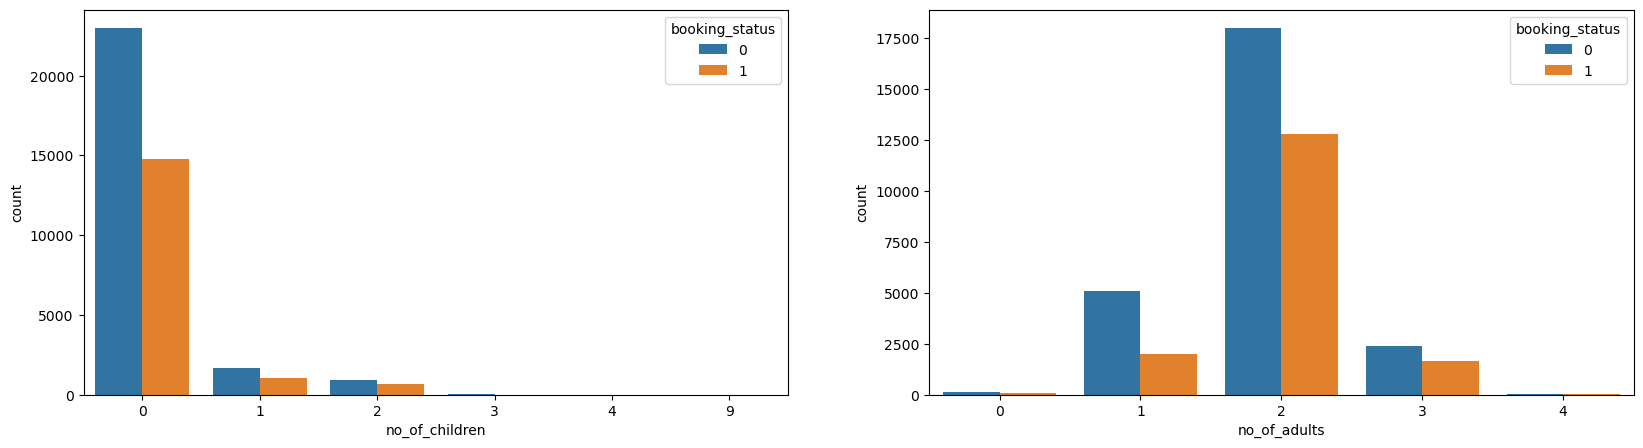

In [401]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(data=df, x='no_of_children', hue='booking_status', ax=axes[0])

sns.countplot(data=df, x='no_of_adults', hue='booking_status', ax=axes[1])


<Axes: xlabel='no_of_children', ylabel='count'>

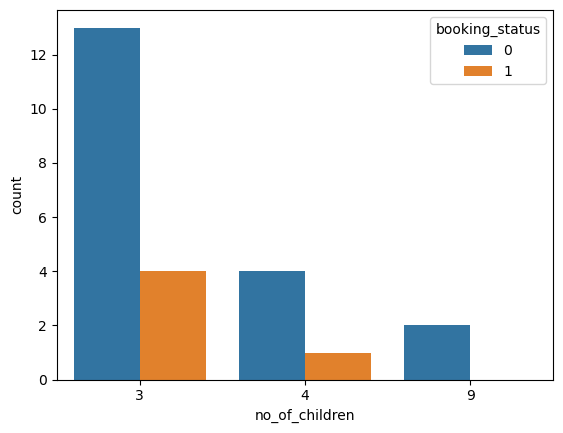

In [402]:
sns.countplot(data=df[df['no_of_children'] > 2], x='no_of_children', hue='booking_status')

In [403]:
df_train = df[df['no_of_children'] < 9]

<Axes: xlabel='no_of_weekend_nights', ylabel='count'>

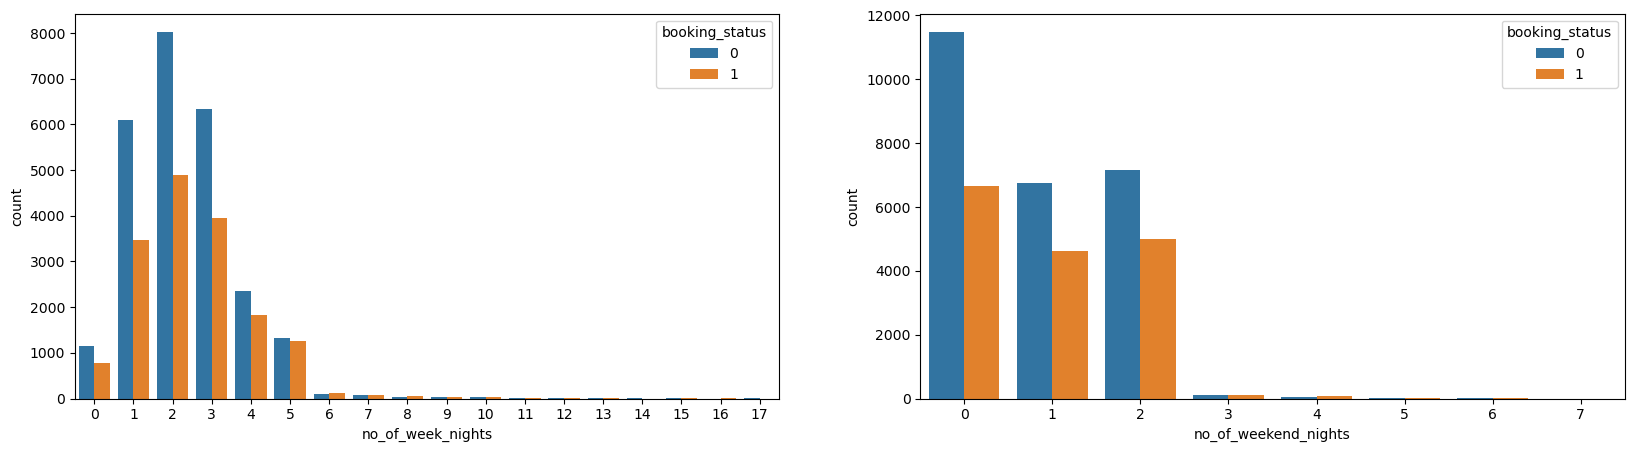

In [404]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(data=df, x='no_of_week_nights', hue='booking_status', ax=axes[0])

sns.countplot(data=df, x='no_of_weekend_nights', hue='booking_status', ax=axes[1])

<Axes: xlabel='room_type_reserved', ylabel='count'>

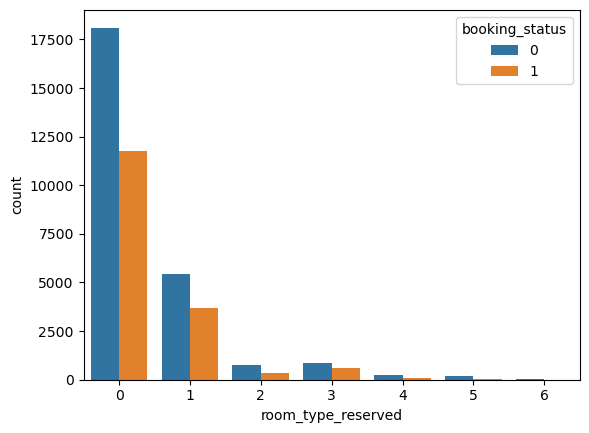

In [405]:
sns.countplot(data=df, x='room_type_reserved', hue='booking_status')

<Axes: >

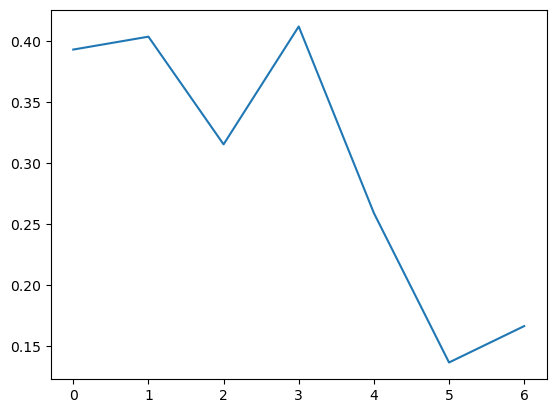

In [406]:
means = []
rooms = df['room_type_reserved'].unique()

for room in rooms:
    means.append(np.mean(list(df[df['room_type_reserved'] == room]['booking_status'])))

sns.lineplot(x=rooms, y=means)

<Axes: >

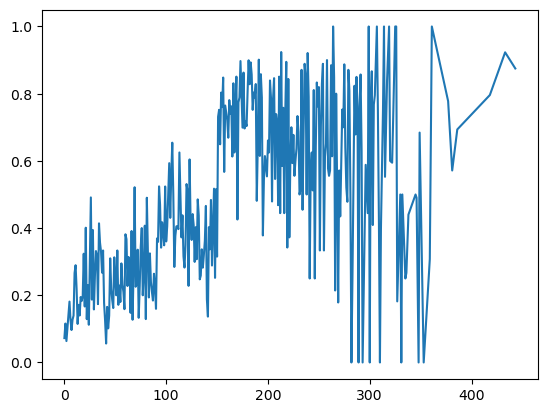

In [407]:
means = []
lead_time = df['lead_time'].unique()

for time in lead_time:
    means.append(np.mean(list(df[df['lead_time'] == time]['booking_status'])))

sns.lineplot(x=lead_time, y=means)

<Axes: xlabel='arrival_date', ylabel='count'>

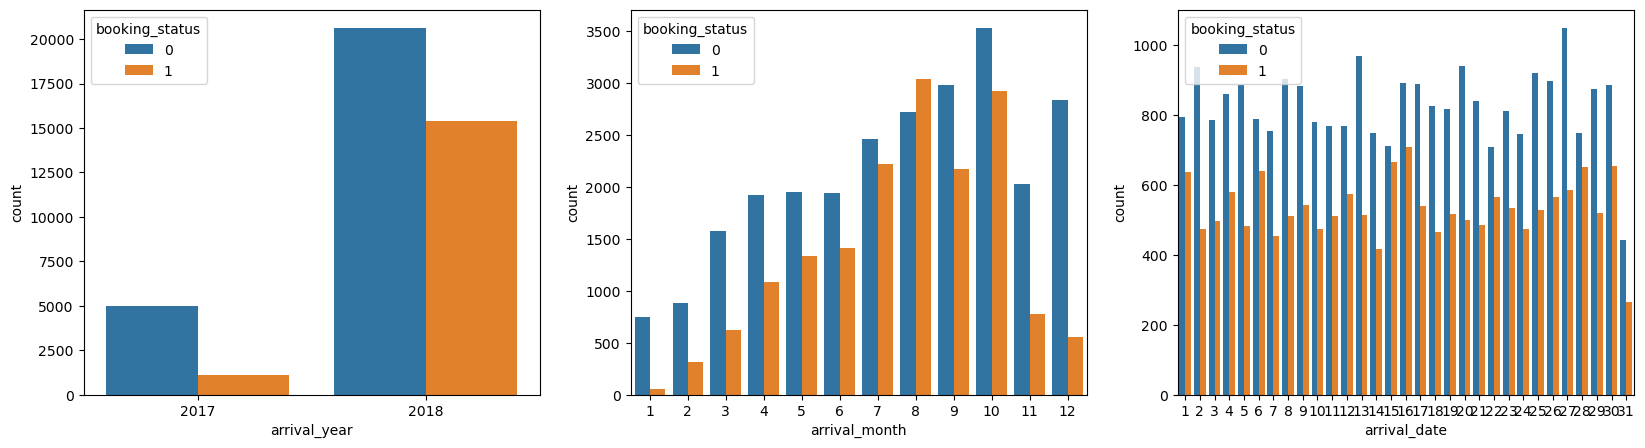

In [408]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.countplot(data=df, x='arrival_year', hue='booking_status', ax=axes[0])

sns.countplot(data=df, x='arrival_month', hue='booking_status', ax=axes[1])

sns.countplot(data=df, x='arrival_date', hue='booking_status', ax=axes[2])

In [409]:
df = pd.concat([df, pd.get_dummies(df['arrival_year'], drop_first=True)], axis=1)
df.drop(['arrival_year'], axis=1, inplace=True)
df.columns = df.columns.astype(str)

In [410]:
df.drop(['arrival_date'], axis=1, inplace=True)

<Axes: xlabel='type_of_meal_plan', ylabel='count'>

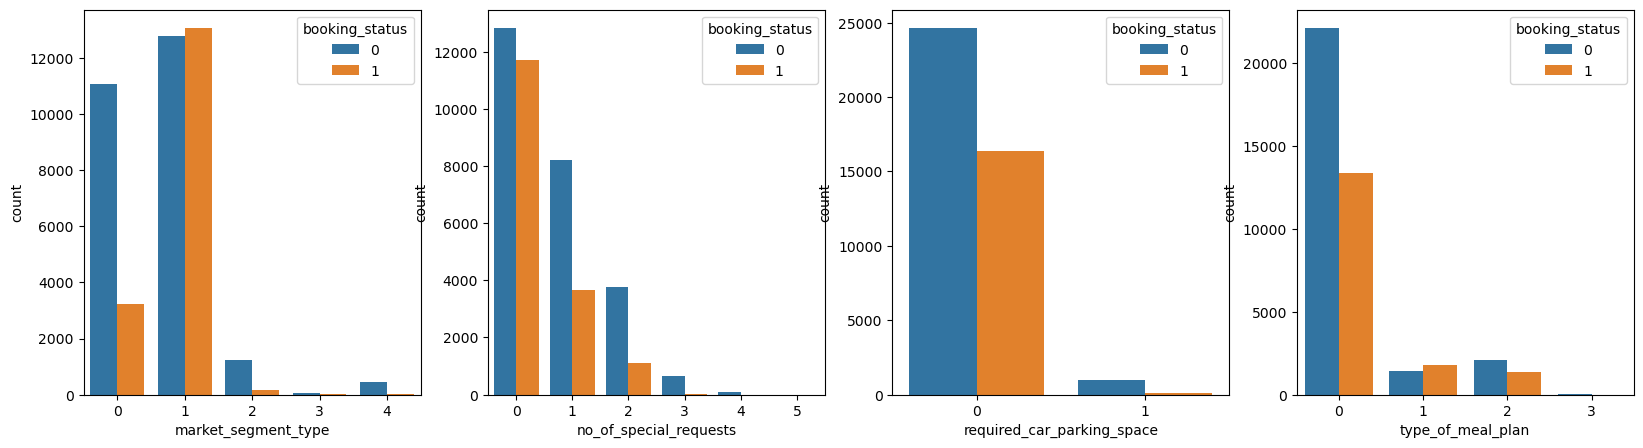

In [411]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.countplot(data=df, x='market_segment_type', hue='booking_status', ax=axes[0])
sns.countplot(data=df, x='no_of_special_requests', hue='booking_status', ax=axes[1])
sns.countplot(data=df, x='required_car_parking_space', hue='booking_status', ax=axes[2])
sns.countplot(data=df, x='type_of_meal_plan', hue='booking_status', ax=axes[3])

<Axes: >

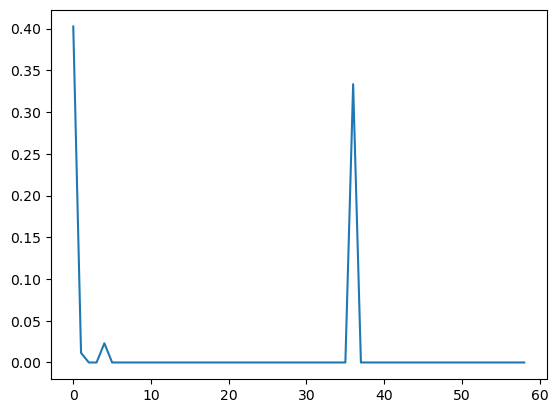

In [412]:
means = []
not_canceled = df['no_of_previous_bookings_not_canceled'].unique()

for item in not_canceled:
    means.append(np.mean(list(df[df['no_of_previous_bookings_not_canceled'] == item]['booking_status'])))

sns.lineplot(x=not_canceled, y=means)

In [413]:
df.drop(['no_of_previous_bookings_not_canceled'], axis=1, inplace=True) # Removing the variable

<Axes: >

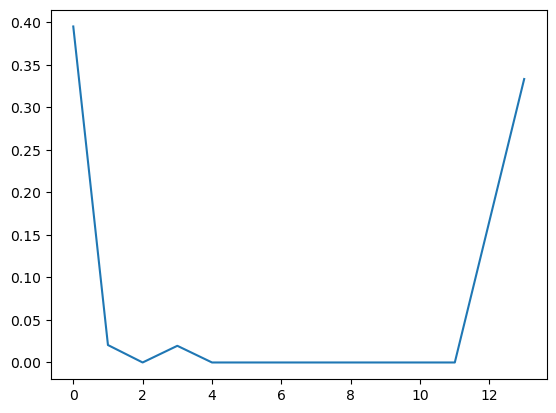

In [414]:
means = []
canceled = df['no_of_previous_cancellations'].unique()

for item in canceled:
    means.append(np.mean(list(df[df['no_of_previous_cancellations'] == item]['booking_status'])))

sns.lineplot(x=canceled, y=means)

<Axes: xlabel='repeated_guest', ylabel='count'>

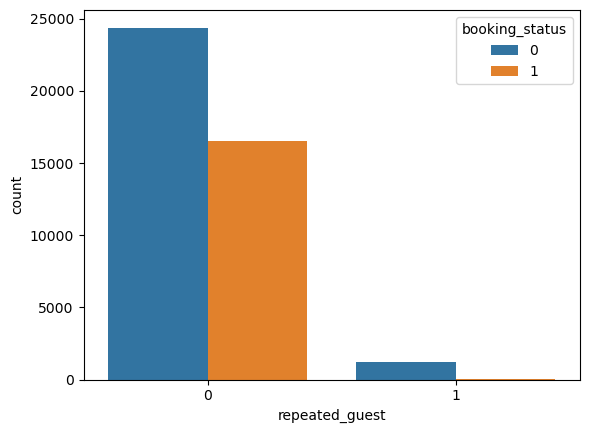

In [415]:
sns.countplot(data=df, x='repeated_guest', hue='booking_status')

**Checking missing values**

In [416]:
df.isna().sum()

no_of_adults                    0
no_of_children                  0
no_of_weekend_nights            0
no_of_week_nights               0
type_of_meal_plan               0
required_car_parking_space      0
room_type_reserved              0
lead_time                       0
arrival_month                   0
market_segment_type             0
repeated_guest                  0
no_of_previous_cancellations    0
avg_price_per_room              0
no_of_special_requests          0
booking_status                  0
2018                            0
dtype: int64

In [417]:
df = df.dropna()

**Observing the correlations**

<Axes: >

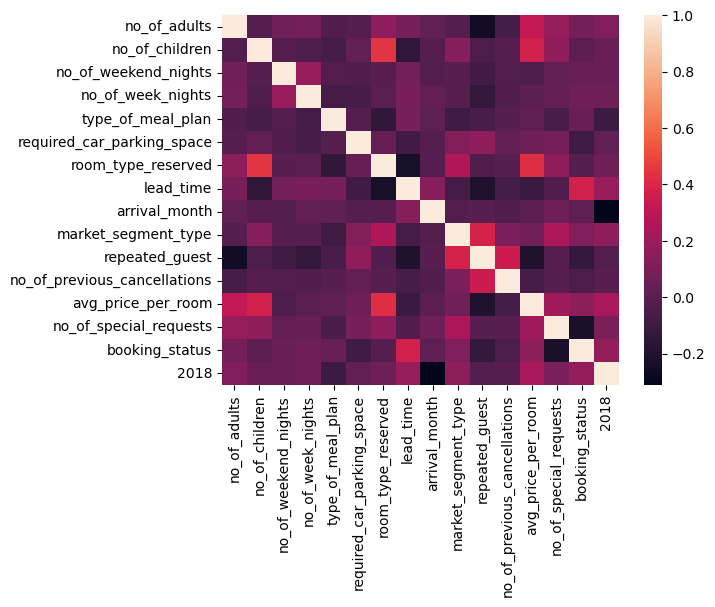

In [418]:
cm = df.corr()

sns.heatmap(cm)

We decided to use a correlation threshold of approximately 0.75 which is widely acceptable. However, none of the variables exceeded this threshold so we did not remove any variables.

**Observing the Target variable**

<Axes: xlabel='booking_status', ylabel='count'>

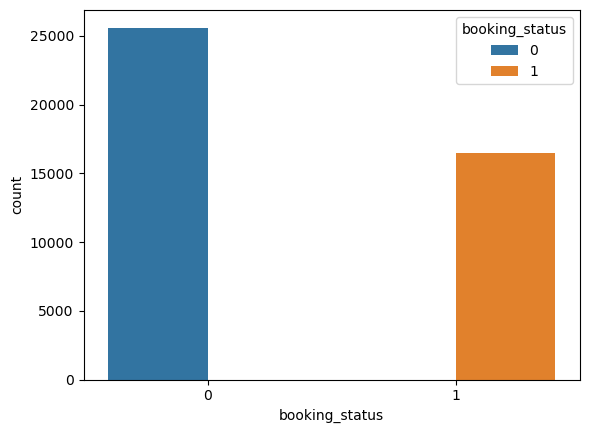

In [419]:
sns.countplot(data=df, x='booking_status', hue='booking_status')

**The data is slightly unbalanced**

In [420]:
columns_final = df.drop('booking_status', axis=1).columns

# **Preprocessing**

In [455]:
df =  pd.read_csv('train.csv')

y = df['booking_status']
X = df.drop(['booking_status'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.3, stratify=y, random_state=2)

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(self.columns_to_drop, axis=1, errors='ignore')

class YearEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if X.shape[0] != 1:
            X = pd.concat([X, pd.get_dummies(X[self.column], drop_first=True)], axis=1)
        else:
            X['2018'] = X[X[self.column] == 2018]
        X = X.drop([self.column], axis=1)
        X.columns = X.columns.astype(str)
        return X

columns_to_drop = ['id', 'no_of_previous_bookings_not_canceled', 'arrival_date']

columnTransform = ColumnTransformer(
    transformers=[
        ('Drop', ColumnDropper(columns_to_drop), columns_to_drop),
        ('year_encoder', YearEncoder('arrival_year'), ['arrival_year'])
    ],
    remainder='passthrough'
)


preprocessor = Pipeline([
    ('columnTransform', columnTransform),
    ('scale', StandardScaler())
])

preprocessor.fit(X_train)

X_train_transformed = pd.DataFrame(preprocessor.transform(X_train), columns=columns_final)
X_val_transformed = pd.DataFrame(preprocessor.transform(X_val), columns=columns_final)


# **Choosing a model**

Organizing our data into predictor variables and target variable and also splitting it so that 30% will be test data and 70% will be training data. We also applied stratification.

Using GridSearchCV to find the best parameters for our models

In [184]:
param_grid_lr = {
    'penalty' : ['l1', 'l2', None],
    'C': list(np.arange(0.001, 1, 0.25)),
    'solver' : ['saga'],
    'max_iter': [4500]
}


gs_lr = GridSearchCV(estimator=LogisticRegression(),
                  param_grid=param_grid_lr)
gs_lr.fit(X_train, y_train)



param_grid_rf = {
    'n_estimators' : list(range(600, 1200, 300)),
    'max_depth': list(range(4, 7)),
}

gs_rf = GridSearchCV(estimator=GradientBoostingClassifier(),
                  param_grid=param_grid_rf)
gs_rf.fit(X_train, y_train)


print('Best params for rf: ', gs_rf.best_params_)
print('Best score for rf: ', gs_rf.best_score_)


param_grid_svc = {
    'penalty' : ['l1', 'l2'],
    'C': list(np.arange(0.2, 1, 0.2)),
}

gs_svc = GridSearchCV(estimator=LinearSVC(),
                  param_grid=param_grid_svc)
gs_svc.fit(X_train, y_train)

print('Best params for svc: ', gs_svc.best_params_)
print('Best score for svc: ', gs_svc.best_score_)

/home/vinogradov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vinogradov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vinogradov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vinogradov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vinogradov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vinogradov/anaconda3/lib/python3.11/site-packages

Best params for lr:  {'C': 0.501, 'max_iter': 4500, 'penalty': 'l2', 'solver': 'saga'}
Best score for lr:  0.7495645288994458
Best params for rf:  {'max_depth': 4, 'n_estimators': 600}
Best score for rf:  0.8008709422011085


/home/vinogradov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/vinogradov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/vinogradov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/vinogradov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/vi

/home/vinogradov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinogradov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/vinogradov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinogradov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/vinogradov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, i

Best params for svc:  {'C': 0.4, 'penalty': 'l2'}
Best score for svc:  0.7489311163895487


/home/vinogradov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [187]:
print('Best params for lr: ', gs_lr.best_params_)
print('Best score for lr: ', gs_lr.best_score_)
print('Best params for rf: ', gs_rf.best_params_)
print('Best score for rf: ', gs_rf.best_score_)
print('Best params for svc: ', gs_svc.best_params_)
print('Best score for svc: ', gs_svc.best_score_)

Best params for lr:  {'C': 0.501, 'max_iter': 4500, 'penalty': 'l2', 'solver': 'saga'}
Best score for lr:  0.7495645288994458
Best params for rf:  {'max_depth': 4, 'n_estimators': 600}
Best score for rf:  0.8008709422011085
Best params for svc:  {'C': 0.4, 'penalty': 'l2'}
Best score for svc:  0.7489311163895487


Best params for lr:  {'C': 0.501, 'max_iter': 4500, 'penalty': 'l2', 'solver': 'saga'}

Best score for lr:  0.7495645288994458


Best params for rf:  {'max_depth': 4, 'n_estimators': 600}

Best score for rf:  0.8008709422011085


Best params for svc:  {'C': 0.4, 'penalty': 'l2'}

Best score for svc:  0.7489311163895487

In [423]:
lr = LogisticRegression(**gs_lr.best_params_)
rf = GradientBoostingClassifier(**gs_rf.best_params_)
svc = LinearSVC(**gs_svc.best_params_, max_iter=5000, dual='auto')

voting_clf = VotingClassifier(estimators=[('lr', lr), ('rf', rf)], voting='soft')

# **Engineering Pipeline**

In [424]:
y = df['booking_status']
X = df.drop(['booking_status'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.3, stratify=y, random_state=2)

In [425]:
pipeline_voiting = Pipeline(steps=[('preprocessor', preprocessor), ('model', voting_clf)])
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor), ('model', lr)])
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('model', rf)])
pipeline_svc = Pipeline(steps=[('preprocessor', preprocessor), ('model', svc)])

# **Model Evaluation**

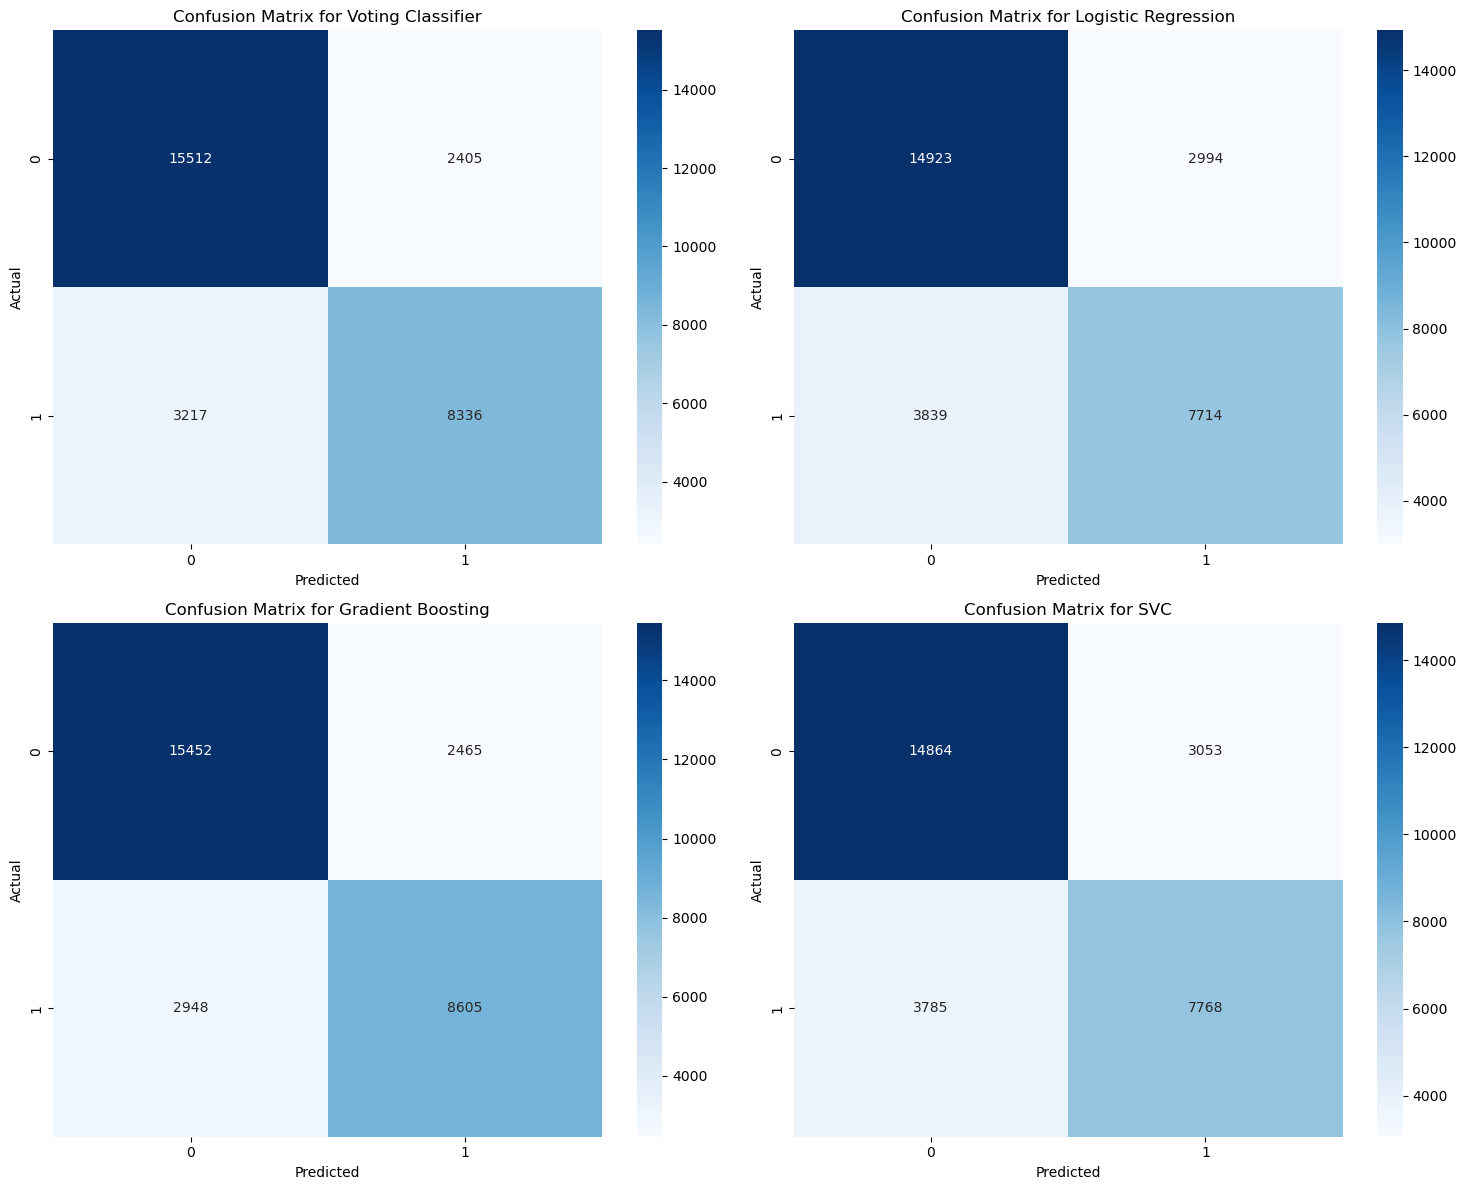

In [426]:
pipeline_voiting.fit(X_train, y_train)
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
pipeline_svc.fit(X_train, y_train)


fig, axes = plt.subplots(2, 2, figsize=(15, 12))

models = [pipeline_voiting, pipeline_lr, pipeline_rf, pipeline_svc]
Labels = ['Voting Classifier', 'Logistic Regression', 'Gradient Boosting', 'SVC']

for i, model in enumerate(models):
    row = i // 2 
    col = i % 2  
    
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred)

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axes[row, col])
    axes[row, col].set_title('Confusion Matrix for ' + Labels[i])
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [427]:
def getRocAucScore(X, y, model):
    n_splits = 5
    roc_auc_scores = []
    cv = StratifiedKFold(n_splits=n_splits)

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)

        y_pred = model.predict_proba(X_test)[:, 1]

        roc_auc = roc_auc_score(y_test, y_pred)
        roc_auc_scores.append(roc_auc)

    mean_roc_auc = np.mean(roc_auc_scores)
    return mean_roc_auc

In [428]:
print('RocAucScore for Voiting Classifier = ', getRocAucScore(X, y, pipeline_voiting))
print('RocAucScore for LinearRegression = ', getRocAucScore(X, y, pipeline_lr))
print('RocAucScore for RandomForest = ', getRocAucScore(X, y, pipeline_rf))

RocAucScore for Voiting Classifier =  0.8859418513764453
RocAucScore for LinearRegression =  0.8332294710465498
RocAucScore for RandomForest =  0.8980302009257718


In [429]:
def make5FoldCVScores(X, y, model):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    cv = StratifiedKFold(n_splits=5)

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]


        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        
    return [np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]

In [430]:
models = [pipeline_voiting, pipeline_lr, pipeline_rf, pipeline_svc]
Labels = ['Voiting Classifier', 'LogisticRegression', 'GradientBoosing', 'SVC']

metrics_summary = pd.DataFrame()

for i, model in enumerate(models):
    
    metrics_summary[Labels[i]] = make5FoldCVScores(X, y, model)
    
metrics_summary.index = ['accuracy_score','precision_score','recall_score','f1_score']

In [431]:
metrics_summary

,Voiting Classifier,LogisticRegression,GradientBoosing,SVC
accuracy_score,0.814086,0.767482,0.824062,0.767268
precision_score,0.782601,0.719830,0.787616,0.717614
recall_score,0.728066,0.666263,0.754726,0.670080
f1_score,0.754332,0.691995,0.770817,0.693012


## * **Accuracy Score**:

The highest accuracy is observed for Gradient Boosting (82,4%), indicating the overall prediction accuracy of this model.
The second most accurate model is Voiting Classifier (81.4%), slightly inferior to Gradient Boosting.


* **Precision Score**:

Precision measures the proportion of true positives among all predicted positives. Here too, Gradient Boosting shows the best score (78.8%), indicating that most of the predictions that a booking will be canceled are indeed correct.
The second best is Voiting Classifier (78.2%).

* **Recall Score**:

Recall measures the proportion of true positives among all true positives. Here again, Gradient Boosting leads the way (75.47%), which means that the model is best able to identify truly canceled bookings.

* **F1 Score**:

F1 Score is the harmonic mean between precision and recall. Again Gradient Boosting has the highest value (77.08%), indicating a balance between accuracy and completeness of predictions.

* **ROC AUC Score**:

ROC AUC score is the area under roc curve. As F1 score, it is metric, that reproduce 'mean' between Recall and Precision. ROC AUC is helpul, when we have unbalanced data, which we actually have. Again Gradient Boosting has the highest value (89.8%).

* **Conclusions**:

Gradient Boosting stands out among the reviewed models, showing the best performance in all the metrics considered. It has a good ability to both predict bookings cancellations and find them among the actual cancellations.

# **Feature Importance**

Text(0.5, 1.0, 'Feature Importance - SVC')

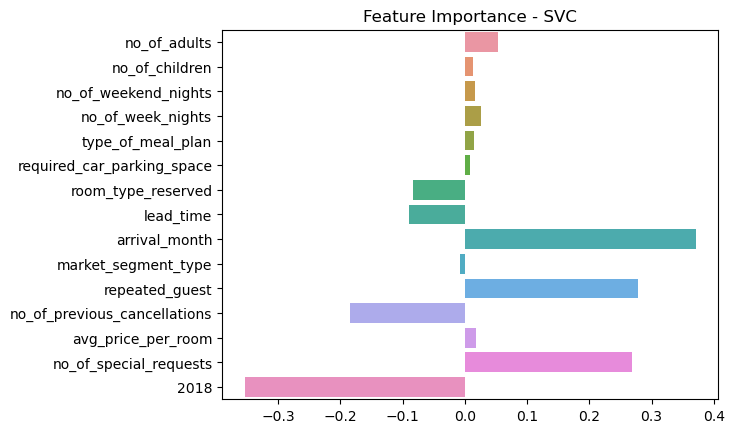

In [432]:
sns.barplot(x = pipeline_svc.named_steps['model'].coef_[0], y = columns_final)
plt.title('Feature Importance - SVC')

Text(0.5, 1.0, 'Feature Importance - SVC')

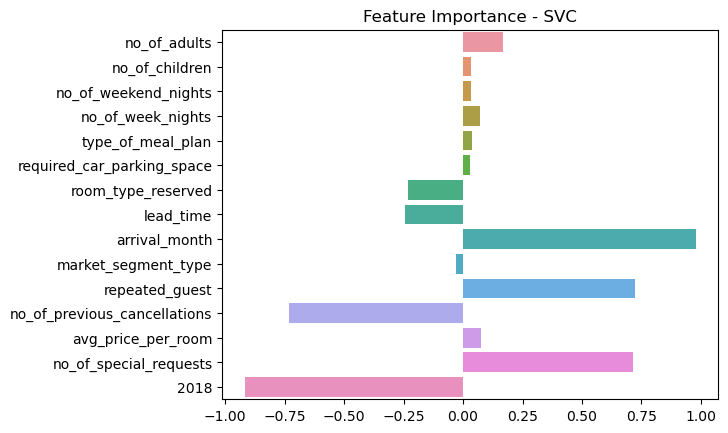

In [433]:
sns.barplot(x = pipeline_lr.named_steps['model'].coef_[0], y = columns_final)
plt.title('Feature Importance - SVC')

Text(0.5, 1.0, 'Feature Importance - SVC')

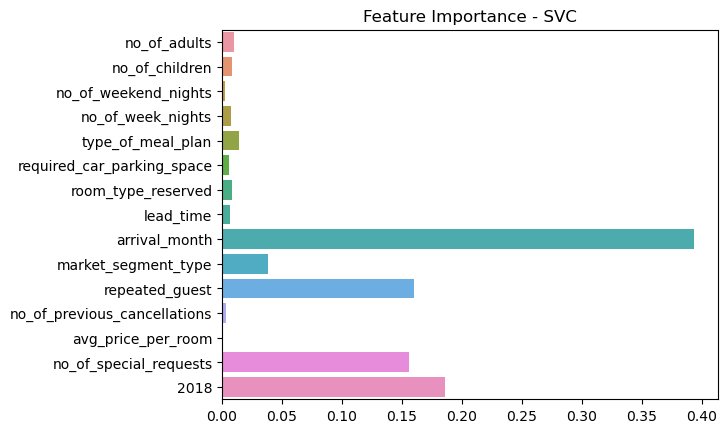

In [434]:
sns.barplot(x = pipeline_rf.named_steps['model'].feature_importances_, y = columns_final)
plt.title('Feature Importance - SVC')

Arrival month, repeated guest, number of special requests, and the year were identified as the most influential features across all models.

Moreover, both linear regression and SVC provide insights into the direction of impact of these values.

# **Exporting Model**

In [436]:
from joblib import dump

In [444]:
dump(pipeline_rf, './../savedModels/clf.joblib')

['./../savedModels/clf.joblib']